
# Decisions Trees

Un **arbre de decision (Decision Tree)** est un modèle d'apprentissage utilisé pour prendre des décisions ou faire des prédictions. Il fonctionne en posant une série de questions simples sur les données, et en suivant les branches selon les réponses (oui/non, >/<, ...) jusqu'à arriver à une décision finale.  
Le modèle cherche la meilleure variable pour faire une première séparation puis le meilleur seuil. Finalement, il répète cela sur chaque sous-groupe pour grandir l'arbre.

## Decision tree classification with scikit-learn

In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

La description du dataset indique 3 classes, 50 samples par classe, 150 samples au total et 4 features, vérifions cela.

In [2]:
print(f"Il y a {X.shape[0]} samples et {X.shape[1]} features\n")
print(f"features:\n {iris.feature_names}\n")
print(f"classes:\n {iris.target_names}\n")

unique, counts = np.unique(y, return_counts=True)
for u, c in zip(unique, counts):
    print(f"{c} données dans la classe {u}")

Il y a 150 samples et 4 features

features:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

classes:
 ['setosa' 'versicolor' 'virginica']

50 données dans la classe 0
50 données dans la classe 1
50 données dans la classe 2


Les données chargées correspondent bien à la description fournit dans la documentation.

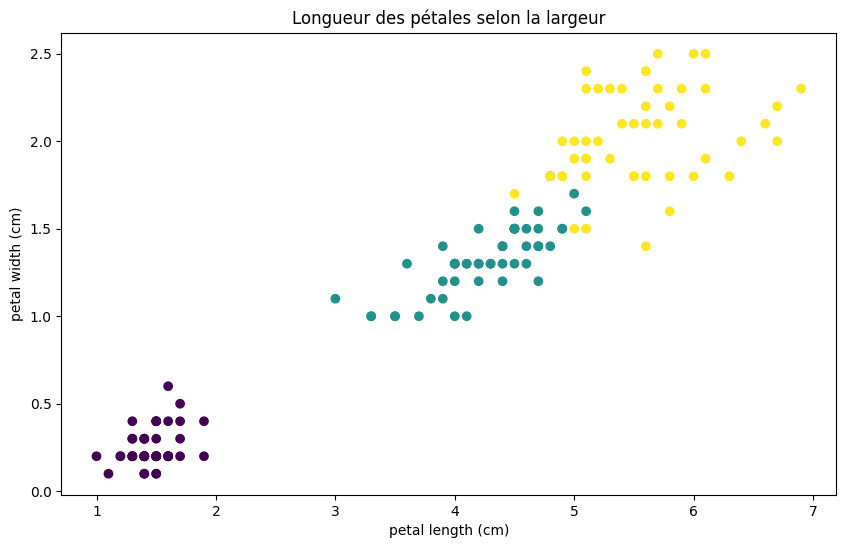

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,2],X[:,3], c=y)
plt.title("Longueur des pétales selon la largeur")
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

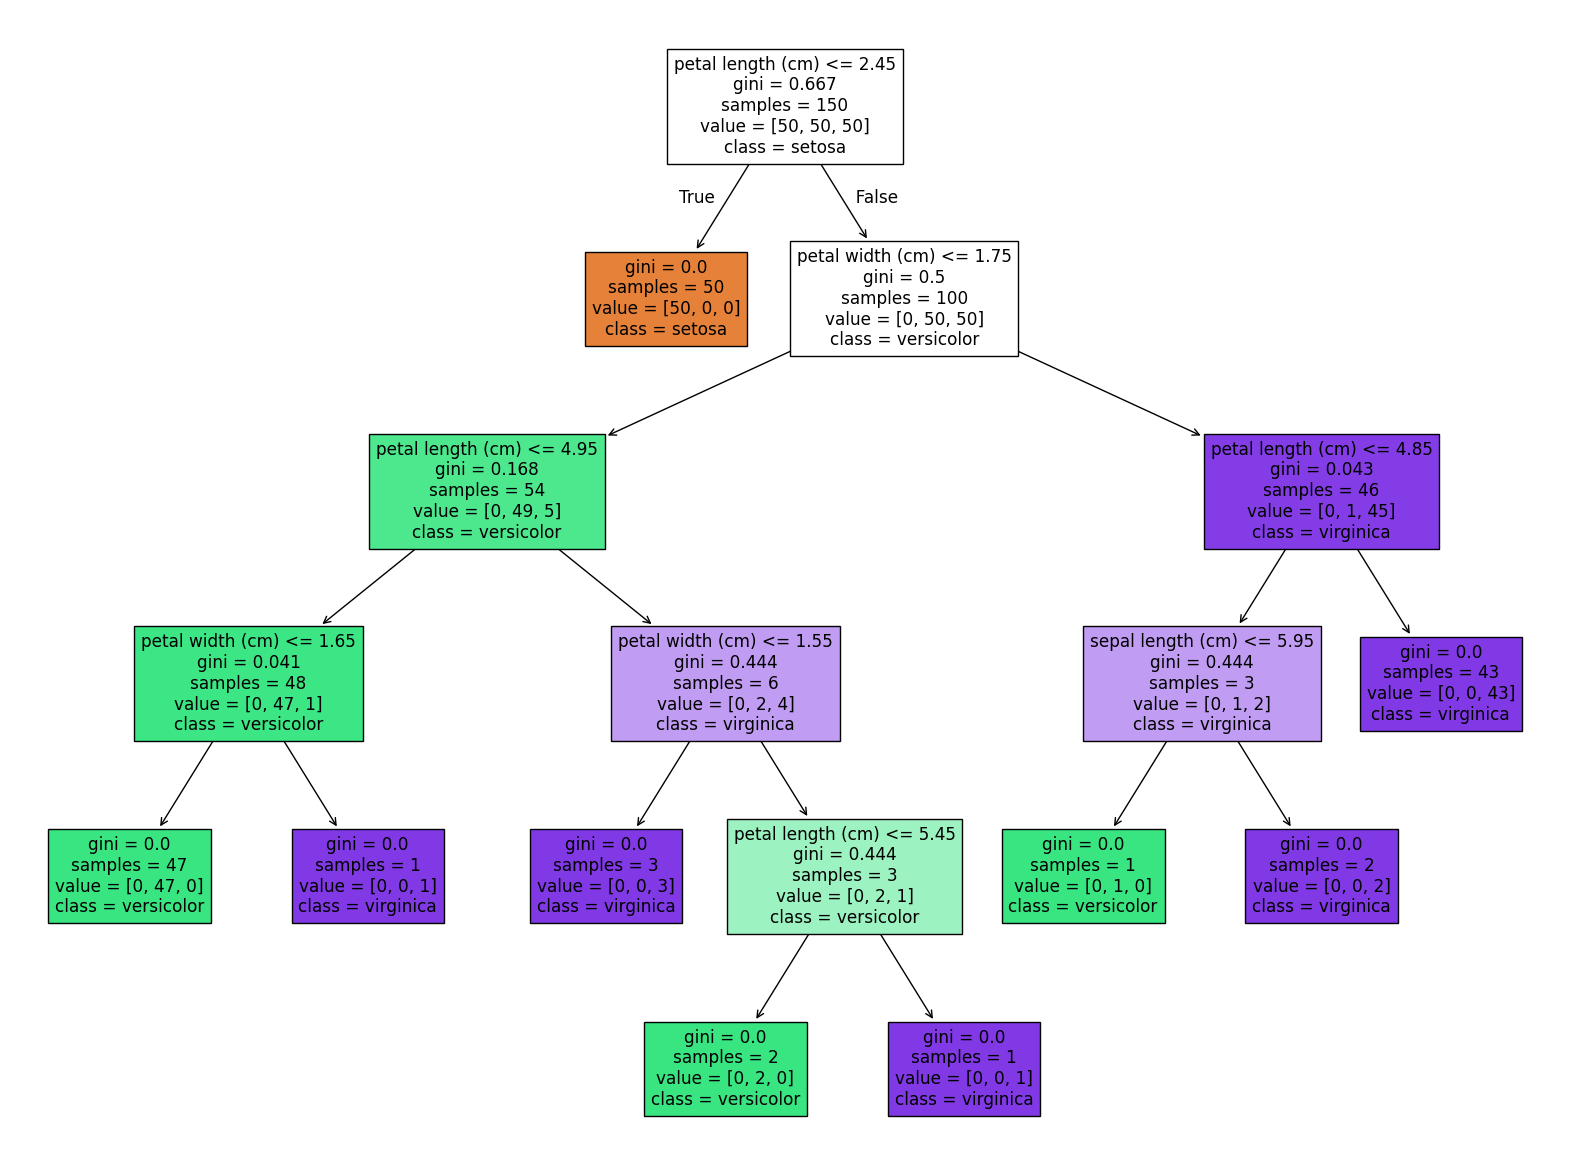

In [4]:
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X,y)

plt.figure(figsize=(20,15))
plot_tree(clf, filled=True, feature_names=iris.feature_names, 
              class_names=iris.target_names)
plt.show()

**impureté de Gini**: mesure de qualité de séparaition: indique à quel point un noeud contient un mélange de classes.  
- Gini=0: noeud pur => une seule classe.
- GIni élevé => mélange de classes.

Prenons ce noeud par exemple:
- petal length(cm) < 4 
- gini = 0.043 
- samples = 46 
- value = [0,1,45] 
- class = virginica

Cela signifie que toutes les fleurs du noeud ont une longueur de pétal inférieure à 4cm, qu'il y a 46 fleurs dont 0 setosa, 1 versicolor, 45 virginica, et la classe majoritaire est virginica. L'indice de gini est faible, ce qui indique une classe proche d'être pure.

On pourrait croire qu'il faudrait une valeur de gini à 0 pour chaque noeud or cela impliquerait d'avoir un arbre très profond or cela signifierait un modèle plus compliqué, probablbment du surapprentissage => il faut trouver un compromis: trouver un arbre assez pur sans être trop profond.

L’arbre obtenu ici possède une profondeur de 6 et des nœuds parfaitement purs (gini = 0).
Ceci indique que le modèle a continué à se diviser jusqu’à mémoriser les données d’entraînement, ce qui correspond à un phénomène d’overfitting.
Pour éviter cela, il est nécessaire de fixer des hyperparamètres limitant la croissance de l’arbre, comme max_depth,

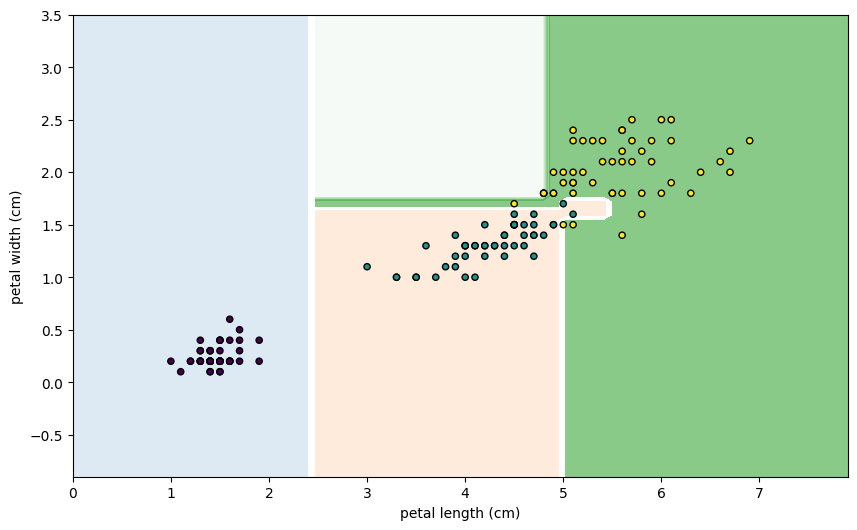

In [5]:
from sklearn.inspection import DecisionBoundaryDisplay

# entraînement du modèle sur les 2 dernières features de X
X_2d = X[:, 2:4]
clf = DecisionTreeClassifier(random_state=42).fit(X_2d , y)
_, ax = plt.subplots (1, 1, figsize =(10, 6))

# afficher la frontière de décision 
DecisionBoundaryDisplay.from_estimator(clf, X_2d, ax=ax,
                 xlabel= iris.feature_names[2], 
                 ylabel=iris.feature_names[3], alpha =0.6)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor='k', s=20)
plt.show()

On a bien une séparation des données en 3 classes selon 3 couleurs. Ce qui est étonnant c'est la séparation car durant le tp on avait uniquement 3 couleurs mais en relançant les cellules sur nos ordinateurs personnels on avait cette 4ème couleur qui ne contient évidemment aucune donnée car il n'y a que 3 classes. Mise à part cela, on voit bien les découpages de l'arbre; par exemple, il a coupé les données selon la longueur de leur pétale à environ 2,4cm.

## Decision trees and overfitting

In [27]:
from sklearn.datasets import make_classification

n = 2000
n_features = 20
n_classes = 2

X, y = make_classification (n_samples=n, n_features=n_features,
                            n_classes=n_classes, class_sep=0.9,
                            random_state =11)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, 
                                                    test_size=0.4,
                                                   shuffle=True,
                                                   random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [30]:
vect = np.arange(1,21,1)
err_train = np.empty(vect.shape[0])
err_test = np.empty(vect.shape[0])

for depth in range (1 ,21):
    dt = DecisionTreeClassifier(max_depth=depth).fit(X_train, Y_train)
    i = depth - 1
    err_train[i] = 1 - accuracy_score(Y_train, dt.predict(X_train))
    err_test[i] = 1 - accuracy_score(Y_test, dt.predict(X_test))

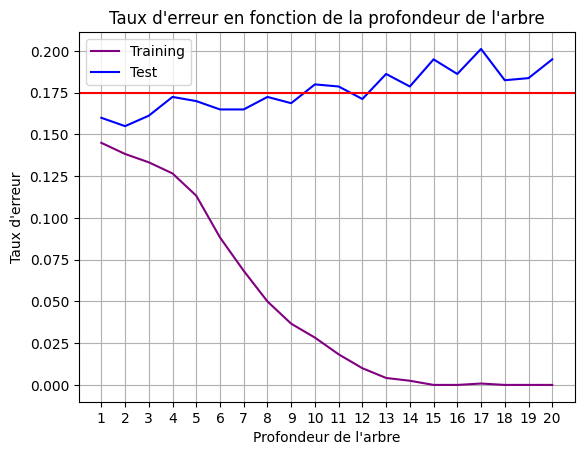

In [55]:
plt.figure()
plt.plot(vect, err_train, label="Training", c='purple')
plt.plot(vect, err_test, label="Test", c='blue')
plt.title("Taux d'erreur en fonction de la profondeur de l'arbre")
plt.xlabel("Profondeur de l'arbre")
plt.xticks(vect)
plt.grid()
seuil_err = 0.175
plt.axhline(y=seuil_err, color="red")
plt.ylabel("Taux d'erreur")
plt.legend()
plt.show()

On observe que l'erreur de Training diminue constamment lorsque la profondeur exacte, l'arbre mémorise presque parfaitement les données (erreur de Training environ à 0), ce qui montre que le modèle est trop complexe. L'erreur de Test est la plus faible pour une profondeur comprise entre 1 et 5. A partir d'une profondeur de 6, elle augmente puis oscielle légèrement avant de monter. Donc le modèle généralise moins bien quand la profondeur de l'arbre augmente. **Le compromis est de choisir une erreur de Training raisonnablement basse avec une erreur de test la plus faible possibleEn conclusion, le modèle surraprend lorsque la profondeur augmente**. On doit choisir une profondeur entre 3 et 6.

## Combining decision trees 

In [35]:
from sklearn.datasets import make_moons

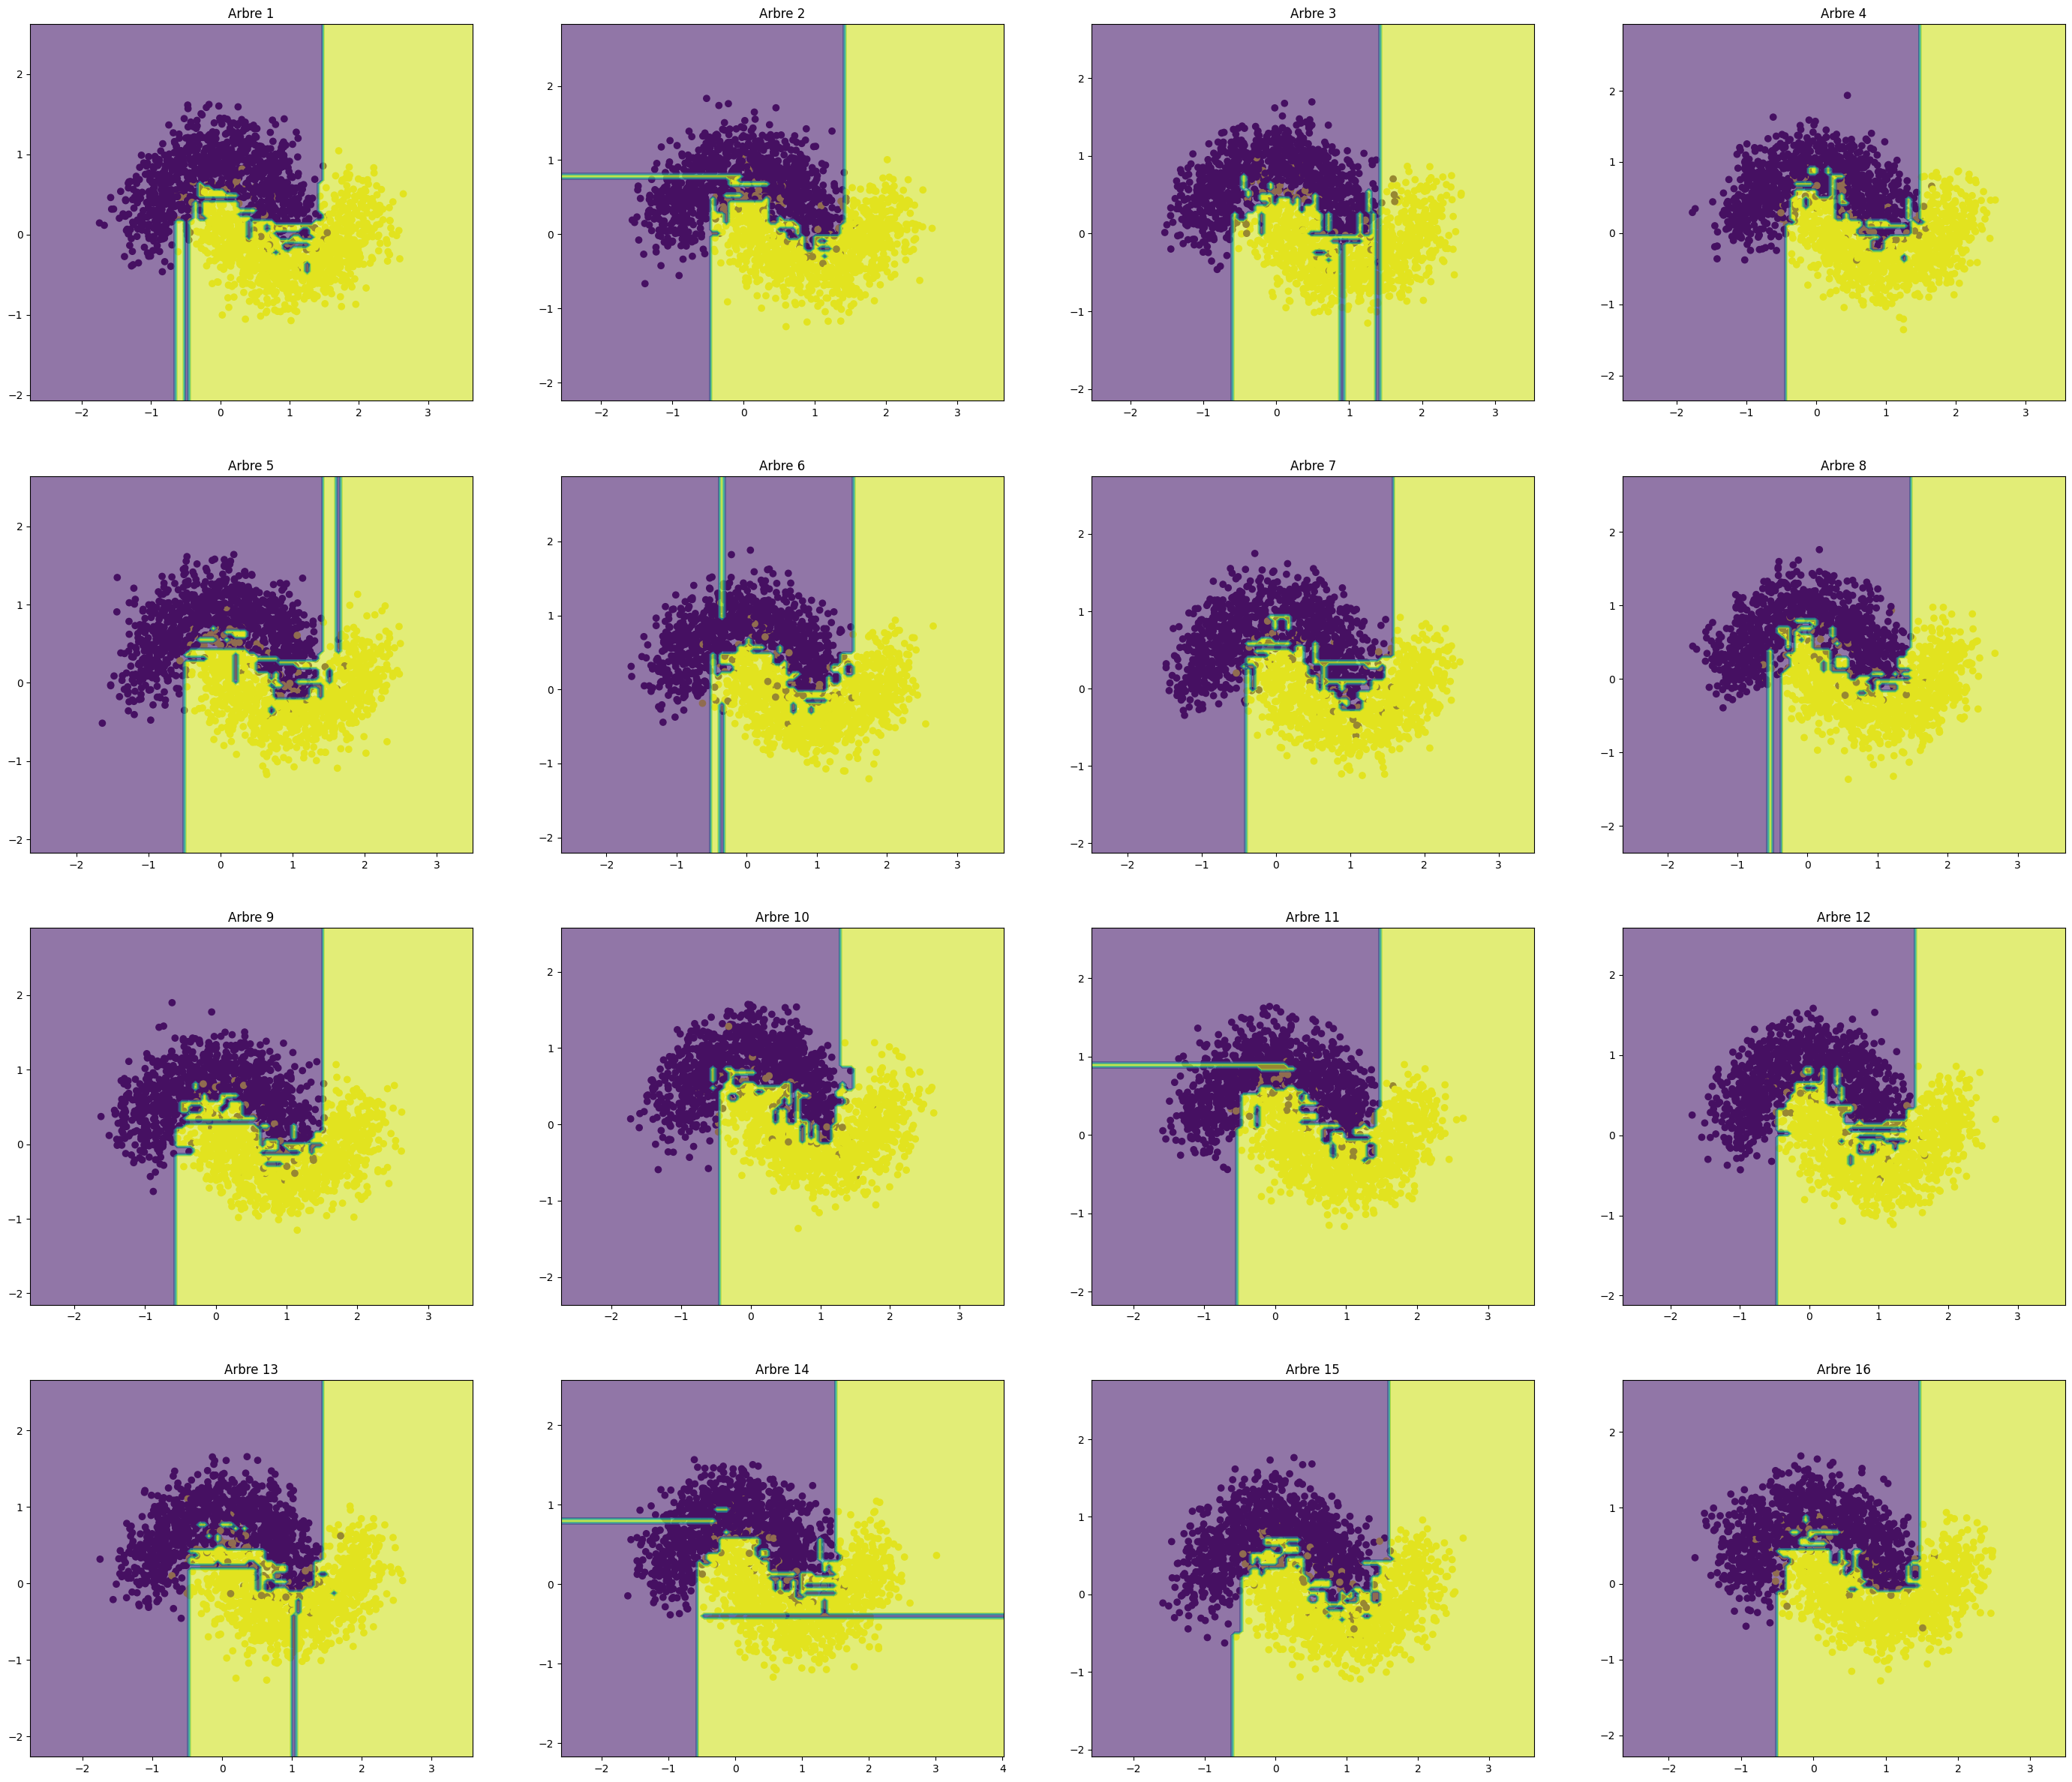

In [38]:
_, axes = plt.subplots (4, 4, figsize =(35, 30))
for i in range (16):
    X, y = make_moons(n_samples=n, noise=0.25)
    dt = DecisionTreeClassifier(random_state=42).fit(X, y)
    axes[i//4,i%4].scatter(X[:,0], X[:,1], c=y)
    DecisionBoundaryDisplay.from_estimator(dt, X, ax=axes[i//4,i%4]
                                           ,alpha =0.6)
    axes[i//4, i%4].set_title(f"Arbre {i+1}")

Chaque subplot montre un jeu de données légèrement différent à cause du bruit et de l'échantillonnage aléatoire, mais ils sont très semblables. Les frontières de décision suivent assez bien la forme de des données mais peuvent être parfois irrégulières voir fragmentées selon les arbres. Globalement, on remarque que les arbres séparent bien les deux classes, la complexité des frontières varie delon l'échantillon.

In [144]:
from sklearn.ensemble import BaggingClassifier

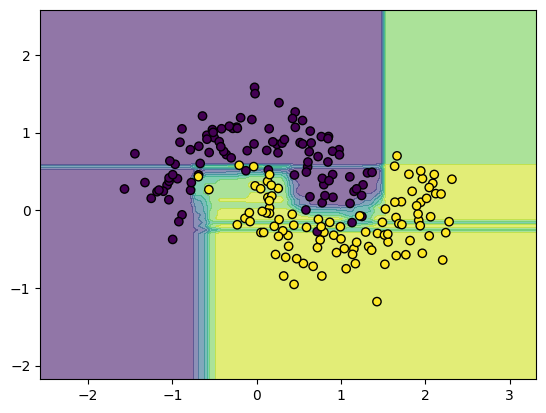

In [151]:
X, y = make_moons(n_samples=200, noise=0.25)
forest = BaggingClassifier(n_estimators = 30).fit(X, y)
DecisionBoundaryDisplay.from_estimator(forest, X, alpha =0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k');

Après avoir testé plusieurs couples (n_samples, noise) et fait varier n_estimator, il semble que noise=0.25 (pour une séparation pas trop chaotique des données), que n_samples=200 et n_estimators=30 soit assez pertinent car si on a un nombre d'arbres trop faibles, les points les plus bruités de chaque classe sont mal classés.

## Spam classification

In [209]:
dataspam = np.loadtxt("spambase/spambase.data", delimiter=",")
features_name = np.genfromtxt("spambase/spambase_variables.csv", delimiter=",", dtype="str")
features_name = features_name[:,0]
X = dataspam[:,0:57]
y = dataspam[:,-1]

In [210]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                test_size= 1/3, train_size = 2/3)

In [176]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [177]:
vect = np.arange(1,21,1)
err_train = np.empty(vect.shape[0])
err_test = np.empty(vect.shape[0])

for depth in range (1 ,21):
    dt = DecisionTreeClassifier(max_depth=depth, 
                               random_state=42).fit(X_train, Y_train)
    i = depth - 1
    err_train[i] = 1 - accuracy_score(Y_train, dt.predict(X_train))
    err_test[i] = 1 - accuracy_score(Y_test, dt.predict(X_test))

Déterminons unr profondeur maximal optimal:

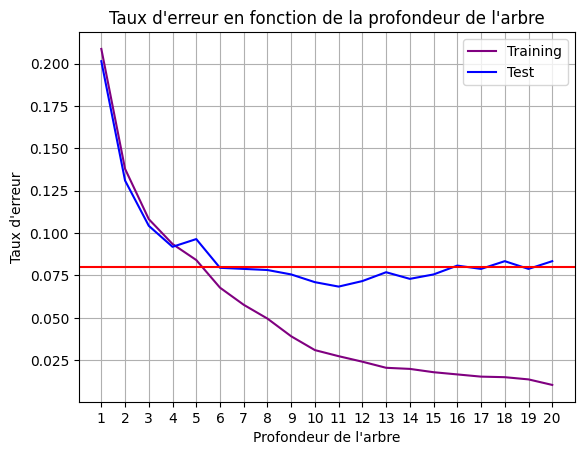

In [178]:
plt.figure()
plt.plot(vect, err_train, label="Training", c='purple')
plt.plot(vect, err_test, label="Test", c='blue')
plt.title("Taux d'erreur en fonction de la profondeur de l'arbre")
plt.xlabel("Profondeur de l'arbre")
plt.xticks(vect)
plt.grid()
seuil_err = 0.08
plt.axhline(y=seuil_err, color="red")
plt.ylabel("Taux d'erreur")
plt.legend()
plt.show()

On déduit graphiquement que la meilleur profondeur de l'arbre est 11.
On va tester le taux d'erreur pour cette profondeur.

In [183]:
dt = DecisionTreeClassifier(random_state=42, max_depth=11)
dt.fit(X_train,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,11
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [184]:
err_train = 1 - accuracy_score(Y_train, dt.predict(X_train))
err_test = 1 - accuracy_score(Y_test, dt.predict(X_test))

print(f"Erreur de train : {100*err_train}%")
print(f"Erreur de test : {100*err_test}%")

Erreur de train : 2.7388327355722164%
Erreur de test : 6.844850065189045%


On obtient une erreur de test de 6.84%, ce qui est relativement faible, surtout pour un modèle avec un seul arbre.

Désormais, essayons d'utiliser une forêt:

In [216]:
forest = BaggingClassifier(n_estimators=100, random_state=42).fit(X_train, Y_train)

In [217]:
err_test = 1 - accuracy_score(Y_test, forest.predict(X_test))
print(f"Erreur de test: {100*err_test:.4f}%")

Erreur de test: 5.1499%


On a testé différents modèles pour le problème spam classification. On a:  
- Logistic Regression: taux d'erreur de test de 8%.
- Linear SVM: taux d'erreur de test de 7%.
- Kernel SVM: taux d'erreur de test de 5%.
- Decision Trees: taux d'erreur de test de 7.2%.
- Random Forest: taux d'erreur de test de 5.15%.

En conclusion, le Kernel SVM et le Random Forest sont les meilleurs modèles pour ce dataset.